In [4]:
!pip install mplfinance

  Using cached mplfinance-0.12.9b1-py3-none-any.whl (70 kB)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sqlalchemy
from binance.client import Client
from binance import BinanceSocketManager
import mplfinance as mpf         


In [3]:
api_key = 'zyN3R5T1FOPwKLBvxnf09X6EkKzcIEBCes1RpNqD6moXU7YoqOBX3M2vFcUgCAQy'
api_secret = 'dQMgSnNJs3MrBvU5qx65WYmn7PIAK9o0LLjLLVmPicjjCsWTA3iFA6H9UwDKn55h'
client = Client(api_key, api_secret)

In [4]:
pd.DataFrame(client.get_historical_klines('BTCUSDT', '1m', '30 m ago UTC'))

,0,1,2,3,4,5,6,7,8,9,10,11
0,1654641660000,31292.86000000,31292.86000000,31212.33000000,31218.37000000,121.37063000,1654641719999,3793020.47986790,2167,41.28969000,1290200.28765210,0
1,1654641720000,31218.36000000,31260.54000000,31207.97000000,31250.09000000,91.22595000,1654641779999,2849703.48089440,2085,51.85196000,1619911.78221500,0
2,1654641780000,31250.10000000,31265.22000000,31077.02000000,31184.60000000,419.70342000,1654641839999,13071883.13796610,5009,246.53803000,7675140.07468150,0
3,1654641840000,31184.59000000,31225.64000000,31128.97000000,31136.09000000,235.69114000,1654641899999,7350789.65472060,3452,115.36720000,3598030.24194910,0
4,1654641900000,31136.08000000,31181.70000000,31114.29000000,31162.37000000,148.86189000,1654641959999,4638533.15638470,1918,81.10959000,2527411.15554900,0
5,1654641960000,31162.36000000,31188.62000000,31003.84000000,31045.46000000,449.73275000,1654642019999,13986924.30256710,3664,264.49332000,8225635.52291420,0
6,1654642020000,31042.58000000,31048.51000000,30720.00000000,30727.69000000,792.55777000,1654642079999,24481564.34203840,11409,302.21707000,9337822.92875750,0
7,1654642080000,30727.69000000,30750.00000000,30574.57000000,30676.44000000,485.72755000,1654642139999,14899571.65616720,8359,230.21043000,7063197.96223490,0
8,1654642140000,30676.44000000,30676.44000000,30339.73000000,30350.01000000,528.06505000,1654642199999,16110266.70023480,8130,186.44080000,5689719.18795520,0
9,1654642200000,30350.01000000,30599.35000000,30300.00000000,30511.69000000,460.48813000,1654642259999,14029394.91865200,6470,246.89293000,7522439.75679100,0


In [5]:
def getminutdata(symbol, interval, lookback ):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback+' min ago UTC')) #請求過去kline資料 symbol(交易對) interval(時間單位) loockback(現在到往回幾分鐘)
    frame = frame.iloc[:, :6] # 只要0~6行資料 詳細可以看binance api 有payload樣本。
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] #更改column標籤
    frame = frame.set_index('Time') #把左邊的index改成時間戳
    frame.index = pd.to_datetime(frame.index, unit='ms') #從電腦時間變成正常時間
    frame = frame.astype(float) #全部的資料轉成float 方便計算。
    return frame


In [6]:

pair = 'BTCUSDT'


In [7]:
btcusdttest = getminutdata(pair, '1m', '120')

In [8]:
names = ['Date', 'Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']
df = btcusdttest
df_adj = df.iloc[:,0:4]                  # 'Close', 'High', 'Low', 'Open'

In [9]:
df_adj

,Open,High,Low,Close
Time,,,,
2022-06-07 21:11:00,31495.67,31500.00,31482.95,31488.60
2022-06-07 21:12:00,31488.60,31495.50,31439.03,31452.06
2022-06-07 21:13:00,31452.06,31476.38,31452.05,31461.43
2022-06-07 21:14:00,31461.43,31461.44,31435.22,31435.22
2022-06-07 21:15:00,31435.23,31498.84,31435.22,31497.62
...,...,...,...,...
2022-06-07 23:06:00,31121.37,31232.67,31077.27,31092.46
2022-06-07 23:07:00,31092.46,31162.20,31062.10,31100.05
2022-06-07 23:08:00,31100.06,31187.14,31091.63,31186.04


In [10]:
mc = mpf.make_marketcolors(
	up='red',                     # 上漲 K 棒顏色
	down='green',                 # 下跌 K 棒顏色 
	edge='i',                     # K線線柱邊緣顏色(i代表繼承自up和down的顏色)
	wick='i',                     # 上下影線顏色
	volume='in',                  # 成交量長條圖的顏色
	inherit=True)                 # 是否繼承顏色設定

s = mpf.make_mpf_style(
	gridaxis='both',              # 格線位置
	gridstyle='-.',               # 格線線型
	y_on_right=False,             # y軸位置是否在右
    rc={'font.size':12, 
        'font.sans-serif':'SimHei',   # 指定中文字型
        'axes.titlesize':18,
        'axes.labelsize':16,
        'xtick.labelsize':12,
        'ytick.labelsize':12},
	marketcolors=mc)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


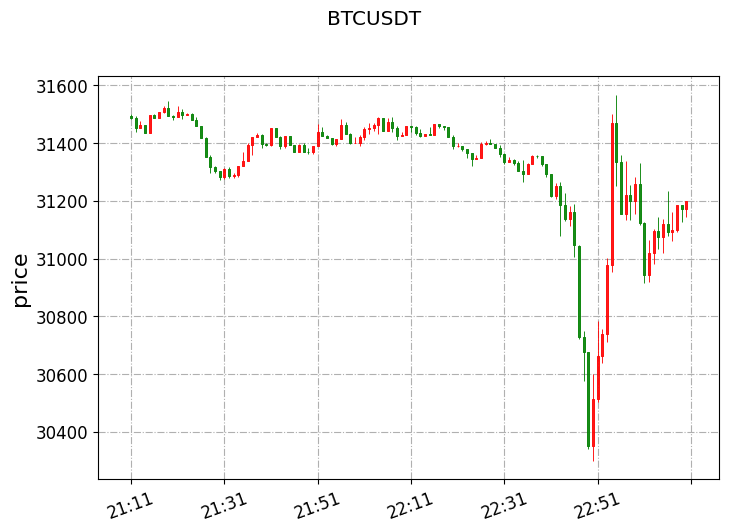

In [11]:
mpf.plot(df_adj,
         type='candle',            # 指定 K 棒繪圖符號格式
         title='BTCUSDT',
         ylabel='price',
         figratio=(15, 10),        # 圖形大小
         figscale=1,
         xrotation=20,             # 日期顯示旋轉角度
         style=s,                  # 設定繪圖風格
         show_nontrading=False)    # 是否顯示無交易日

In [12]:
df.describe()

,Open,High,Low,Close,Volume
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,31319.566750,31354.382000,31283.888917,31317.102500,133.513510
std,206.949806,175.617865,233.296217,206.568162,176.896982
min,30350.010000,30599.350000,30300.000000,30350.010000,10.178180
25%,31291.677500,31322.105000,31262.592500,31287.787500,36.190180
50%,31391.000000,31402.495000,31371.010000,31389.495000,56.607870
75%,31440.220000,31458.667500,31425.872500,31436.417500,113.811862
max,31521.690000,31568.000000,31503.660000,31521.700000,827.241900


In [13]:
Op_Cl = df.Close - df.Open
delta = abs(Op_Cl)
print(delta.head())

Time
2022-06-07 21:11:00     7.07
2022-06-07 21:12:00    36.54
2022-06-07 21:13:00     9.37
2022-06-07 21:14:00    26.21
2022-06-07 21:15:00    62.39
dtype: float64


In [14]:
print(delta.describe())
std = delta.std()
q3 = delta.quantile(q=0.75)
q2 = delta.quantile(q=0.5)
q1 = delta.quantile(q=0.25)

count    120.000000
mean      44.027083
std       68.262060
min        0.510000
25%       12.085000
50%       26.265000
75%       41.540000
max      493.810000
dtype: float64


In [15]:
for i in range(0, len(Op_Cl)):
    if Op_Cl[i] > q3:
        pattern = '大陽線'
    elif Op_Cl[i] >= q2:
        pattern = '中陽線'
    elif Op_Cl[i] >= q1:
        pattern = '小陽線'
    elif Op_Cl[i] >= 0:
        pattern = '小陽星'
    elif Op_Cl[i] >= -q1:
        pattern = '小陰星'
    elif Op_Cl[i] >= -q2:
        pattern = '小陰線'
    elif Op_Cl[i] >= -q3:
        pattern = '中陰線'
    else:
        pattern = '大陰線'
    print(df.index[i], df.Open[i], df.Close[i], pattern)

2022-06-07 21:11:00 31495.67 31488.6 小陰星
2022-06-07 21:12:00 31488.6 31452.06 中陰線
2022-06-07 21:13:00 31452.06 31461.43 小陽星
2022-06-07 21:14:00 31461.43 31435.22 小陰線
2022-06-07 21:15:00 31435.23 31497.62 大陽線
2022-06-07 21:16:00 31497.63 31488.79 小陰星
2022-06-07 21:17:00 31488.8 31508.75 小陽線
2022-06-07 21:18:00 31508.74 31521.7 小陽線
2022-06-07 21:19:00 31521.69 31493.01 中陰線
2022-06-07 21:20:00 31493.01 31490.0 小陰星
2022-06-07 21:21:00 31490.0 31509.35 小陽線
2022-06-07 21:22:00 31509.35 31498.14 小陰星
2022-06-07 21:23:00 31498.15 31500.96 小陽星
2022-06-07 21:24:00 31500.85 31481.26 小陰線
2022-06-07 21:25:00 31481.27 31459.16 小陰線
2022-06-07 21:26:00 31459.17 31419.08 中陰線
2022-06-07 21:27:00 31419.07 31353.6 大陰線
2022-06-07 21:28:00 31353.59 31316.99 中陰線
2022-06-07 21:29:00 31316.99 31301.84 小陰線
2022-06-07 21:30:00 31301.84 31283.13 小陰線
2022-06-07 21:31:00 31283.12 31311.2 中陽線
2022-06-07 21:32:00 31311.2 31286.76 小陰線
2022-06-07 21:33:00 31286.77 31288.13 小陽星
2022-06-07 21:34:00 31288.13 31321.19 中陽線
2

In [17]:
for i in range(2, len(Op_Cl)):
    if all([Op_Cl[i-2] < -q2,              # Day 1: 大幅下跌
            abs(Op_Cl[i-1]) < abs(q1),     # Day 2: 十字線
            Op_Cl[i] > q2]):               # Day 3: 大幅上漲
        print("發現晨星!")
        print(df.index[i-2], df.Open[i-2], df.Close[i-2])
        print(df.index[i-1], df.Open[i-1], df.Close[i-1])
        print(df.index[i], df.Open[i], df.Close[i])

發現晨星!
2022-06-07 21:39:00 31428.05 31396.22
2022-06-07 21:40:00 31396.22 31394.74
2022-06-07 21:41:00 31394.74 31451.26
發現晨星!
2022-06-07 23:06:00 31121.37 31092.46
2022-06-07 23:07:00 31092.46 31100.05
2022-06-07 23:08:00 31100.06 31186.04


In [10]:
# buy if asset fell by more then 0.75% within the last 30 min
# sell if asset rises by more then 0.75% or falls further by 0.15%



In [38]:
def strategytest(symbol, qty, entried = False):
    df = getminutdata(symbol, '1m', '30')
    cumulret = (df.Open.pct_change() +1).cumprod() - 1 #累積報酬率 cumulative return 算漲跌幅
    print(cumulret[-1])
    df.Open.plot()
    if not entried:
        if cumulret[-1] < -0.0001 : #跌幅大於0.0001
            order = client.create_order(symbol = symbol,
                                        side = 'BUY', type='MARKET',
                                        quantity=qty)
            print('Succeed!!!!!!')
            print(order)
            entried=True
        else:
            print('No trade has been executed')
    if entried:
        print('trade deal')
        while True:
            df = getminutdata(symbol, '1m', '30')
            sincebuy = df.loc[df.index > pd.to_datetime(
            order['transactTime'], unit='ms')]
            if len(sincebuy) > 0:
                sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1 
                if sincebuyret[-1] > 0.00075 or sincebuyret[-1] < -0.00075 :  #同上
                    order = client.create_order(symbol=symbol,
                                                side='SELL', type= 'MARKET', 
                                                quantity = qty)
                    
                    print(order)
                    break


            




0.001409198384503485
Succeed!!!!!!
{'symbol': 'BTCUSDT', 'orderId': 10771241080, 'orderListId': -1, 'clientOrderId': 'COYPV6BOTvfhYrElj1jCH3', 'transactTime': 1653854842317, 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '29.15002000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '29150.02000000', 'qty': '0.00100000', 'commission': '0.00000100', 'commissionAsset': 'BTC', 'tradeId': 1385143112}]}
trade deal
{'symbol': 'BTCUSDT', 'orderId': 10771420493, 'orderListId': -1, 'clientOrderId': '9OkwDHs7waYwwxY1kR6got', 'transactTime': 1653856440724, 'price': '0.00000000', 'origQty': '0.00100000', 'executedQty': '0.00100000', 'cummulativeQuoteQty': '29.11472000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'SELL', 'fills': [{'price': '29114.72000000', 'qty': '0.00100000', 'commission': '0.02911472', 'commissionAsset': 'USDT', 'tradeId': 1385151240}]}


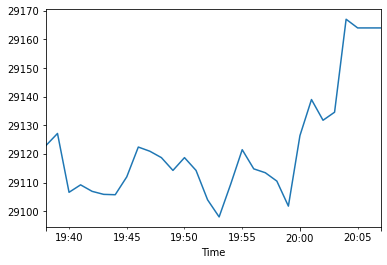

In [40]:
strategytest('BTCUSDT', '0.001')